In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline

In [2]:
#defining the function
f = lambda x,y: (3*y-2*x+1)/(3*x+3)
x0 = 0
h = 0.01
x = np.arange(x0, x0+1+h, step=h)
C = 3
y = lambda x: ((1.0/3)*(x+1)*(C-2*np.log(x+1))-1)

In [3]:
#But we also can not just express y via x, but solve our f_result with help of sympy.solve function
l = sp.Symbol('lambda')
f_result=lambda x, y: 2*sp.log(1+x)+3*(y+1)/(x+1)-C
#And so we can find the result in any point x0 with help of two methods
j=0
y_y=[]
for i in x:
    y_y.append(map(sp.re, sp.solve(f_result(i,l), l)))
    print "For x = {x}: sp.solve -- {y_s} ; lambda-function -- {y_l}".format(x=i,y_s=y_y[j][0], y_l=y(i))
    j+=1

For x = 0.0: sp.solve -- 0.0 ; lambda-function -- 0.0
For x = 0.01: sp.solve -- 0.00330011055886682 ; lambda-function -- 0.00330011055887
For x = 0.02: sp.solve -- 0.00653421343859784 ; lambda-function -- 0.0065342134386
For x = 0.03: sp.solve -- 0.00970295579413943 ; lambda-function -- 0.00970295579414
For x = 0.04: sp.solve -- 0.0128069722137251 ; lambda-function -- 0.0128069722137
For x = 0.05: sp.solve -- 0.0158468850813976 ; lambda-function -- 0.0158468850814
For x = 0.06: sp.solve -- 0.0188233049257238 ; lambda-function -- 0.0188233049257
For x = 0.07: sp.solve -- 0.0217368307553455 ; lambda-function -- 0.0217368307553
For x = 0.08: sp.solve -- 0.0245880503819876 ; lambda-function -- 0.024588050382
For x = 0.09: sp.solve -- 0.0273775407315020 ; lambda-function -- 0.0273775407315
For x = 0.1: sp.solve -- 0.0301058681434951 ; lambda-function -- 0.0301058681435
For x = 0.11: sp.solve -- 0.0327735886600604 ; lambda-function -- 0.0327735886601
For x = 0.12: sp.solve -- 0.0353812483041

# RUNGE-KUTTA method

In [4]:
y_ = [y_y[0][0]]

def y_next(x_n,x_next,y_n,h=h,f=f):
    F1 = f(x_n,y_n)
    F2 = f(x_n+h/2.,y_n+h/2.*F1)
    F3 = f(x_n+h/2.,y_n+h/2.*F2)
    F4 = f(x_next,y_n+h*F3)
    
    return y_n+h/6.*(F1+2*F2+2*F3+F4)

for n in xrange(x.size-1):
    y_.append(y_next(x[n], x[n+1], y_[-1]))

In [5]:
for i in xrange(len(y_)):
    print "{0}. result: {1}".format(i+1, y_[i])

1. result: 0.0
2. result: 0.00330011056104249
3. result: 0.00653421344288621
4. result: 0.00970295580048078
5. result: 0.0128069722220620
6. result: 0.0158468850916761
7. result: 0.0188233049378919
8. result: 0.0217368307693538
9. result: 0.0245880503977889
10. result: 0.0273775407490513
11. result: 0.0301058681627494
12. result: 0.0327735886809786
13. result: 0.0353812483266472
14. result: 0.0379293833718622
15. result: 0.0404185205968140
16. result: 0.0428491775395762
17. result: 0.0452218627372171
18. result: 0.0475370759585956
19. result: 0.0497953084291985
20. result: 0.0519970430483554
21. result: 0.0541427545991513
22. result: 0.0562329099513431
23. result: 0.0582679682575662
24. result: 0.0602483811431087
25. result: 0.0621745928895131
26. result: 0.0640470406122560
27. result: 0.0658661544327404
28. result: 0.0676323576448288
29. result: 0.0693460668761302
30. result: 0.0710076922442469
31. result: 0.0726176375081764
32. result: 0.0741763002150539
33. result: 0.075684071842414

In [6]:
print np.abs(y(x)-y_).max()

1.03623387648355e-10


# ADAMS method

In [7]:
def Adams_n(y,x,h=h,f=f):
    return y[-1]+h/24.*(55*f(x[-1],y[-1]) - 59*f(x[-2],y[-2]) + 37*f(x[-3],y[-3]) - 9*f(x[-4],y[-4]))

In [8]:
y_a = y_[0:4]
for i in range(4,x.size):
    y_a.append(Adams_n(y_a,x[0:i]))

In [9]:
np.abs(np.subtract(y_a,y(x))).max()

6.04502171930310e-9

# Results & errors

In [10]:
with open('TOTALYFINNALY', 'w') as f:
    for i in range(x.size):
        if i % 1 == 0:
            print "x = %f" % x[i]
            f.write("x = %f\n" % x[i])
            print "y(x) = %f" % y(x[i])
            f.write("y(x) = %f\n" % y(x[i]))
            print "Rugne Kutta: y1(x) = %f" % y_[i]
            f.write("Rugne Kutta: y1(x) = %f\n" % y_[i])
            print "error:\t%r" % np.abs(y(x[i]) - y_[i])
            f.write("error:\t%r\n" % np.abs(y(x[i]) - y_[i]))
            print "Adams: y2(x) = %f" % y_a[i]
            f.write("Adams: y2(x) = %f\n" % y_a[i])
            print "error:\t%r" % np.abs(y(x[i]) - y_a[i])
            f.write("error:\t%r\n" % np.abs(y(x[i]) - y_a[i]))
            print "--------------------------------"
            f.write("--------------------------------")

x = 0.000000
y(x) = 0.000000
Rugne Kutta: y1(x) = 0.000000
error:	0
Adams: y2(x) = 0.000000
error:	0
--------------------------------
x = 0.010000
y(x) = 0.003300
Rugne Kutta: y1(x) = 0.003300
error:	2.17568194363360e-12
Adams: y2(x) = 0.003300
error:	2.17568194363360e-12
--------------------------------
x = 0.020000
y(x) = 0.006534
Rugne Kutta: y1(x) = 0.006534
error:	4.28848796751868e-12
Adams: y2(x) = 0.006534
error:	4.28848796751868e-12
--------------------------------
x = 0.030000
y(x) = 0.009703
Rugne Kutta: y1(x) = 0.009703
error:	6.34129207477407e-12
Adams: y2(x) = 0.009703
error:	6.34129207477407e-12
--------------------------------
x = 0.040000
y(x) = 0.012807
Rugne Kutta: y1(x) = 0.012807
error:	8.33709143388539e-12
Adams: y2(x) = 0.012807
error:	1.22722552606258e-10
--------------------------------
x = 0.050000
y(x) = 0.015847
Rugne Kutta: y1(x) = 0.015847
error:	1.02785870093047e-11
Adams: y2(x) = 0.015847
error:	2.49710488398058e-10
--------------------------------
x = 0.

# Start building the plots

In [11]:
def Dh(h,x0=0,step=1,C=3):
    ###########################
    f = lambda x,y: (3*y-2*x+1)/(3*x+3)
    y = lambda x: ((1.0/3)*(x+1)*(C-2*np.log(x+1))-1)
    x = np.arange(x0, x0+step+h, step=h)
    ###########################
    ###########################
    ########Runge-Kutta########
    y_ = [y(x0)]

    def y_next(x_n,x_next,y_n,h=h,f=f):
        F1 = f(x_n,y_n)
        F2 = f(x_n+h/2.,y_n+h/2.*F1)
        F3 = f(x_n+h/2.,y_n+h/2.*F2)
        F4 = f(x_next,y_n+h*F3)
        return y_n+h/6.*(F1+2*F2+2*F3+F4)
    for n in xrange(x.size-1):
        y_.append(y_next(x[n], x[n+1], y_[-1]))
    ###########################
    ##########Adams###########
    def Adams_n(y,x,h=h,f=f):
        return y[-1]+h/24.*(55*f(x[-1],y[-1]) - 59*f(x[-2],y[-2]) + 37*f(x[-3],y[-3]) - 9*f(x[-4],y[-4]))
    y_a = y_[0:4]
    for i in range(4,x.size):
        y_a.append(Adams_n(y_a,x[0:i]))
    ###########################    
    return [np.abs(np.subtract(y_,y(x))).max(), np.abs(np.subtract(y_a,y(x))).max()]

In [97]:
from decimal import Decimal
h_array=[]
inp=raw_input("Enter n: ")
h_temp=1./float(inp)
print "The step is: ",h_temp
h_cumul=h_temp
while h_cumul<1:
    if not (Decimal('1')%Decimal(str(h_cumul))):
        h_array.append(float(format(h_cumul, '.6f')))
    h_cumul+=h_temp
if h_array[-1]==1.:
    del h_array[-1]
#cleanse h_array
for i in xrange(len(h_array)):
    if h_array[i]>=0.1:
        del h_array[i:]
        break
print h_array
#create a
a = np.array([Dh(h=x) for x in h_array])

Enter n: 2000
The step is:  0.0005
[0.0005, 0.001, 0.002, 0.0025, 0.004, 0.005, 0.008, 0.01, 0.0125, 0.02, 0.025, 0.04, 0.05, 0.0625]


In [98]:
print "    Runge-Kutta           Adams\n"
for i in xrange(len(a)):
    print a[i], "while h =",h_array[i]

    Runge-Kutta           Adams

[  8.32667268e-16   4.05647738e-14] while h = 0.0005
[  1.05332409e-14   6.48453513e-13] while h = 0.001
[  1.66713865e-13   1.02953063e-11] while h = 0.002
[  4.06508160e-13   2.50365562e-11] while h = 0.0025
[  2.66116296e-12   1.62163546e-10] while h = 0.004
[  6.49362508e-12   3.92823135e-10] while h = 0.005
[  4.24889707e-11   2.51485630e-09] while h = 0.008
[  1.03623388e-10   6.04502172e-09] while h = 0.01
[  2.52651136e-10   1.44749104e-08] while h = 0.0125
[  1.64911756e-09   8.95300494e-08] while h = 0.02
[  4.01521172e-09   2.10360493e-07] while h = 0.025
[  2.60950629e-08   1.23009701e-06] while h = 0.04
[  6.33449748e-08   2.78520694e-06] while h = 0.05
[  1.53522165e-07   6.19155562e-06] while h = 0.0625


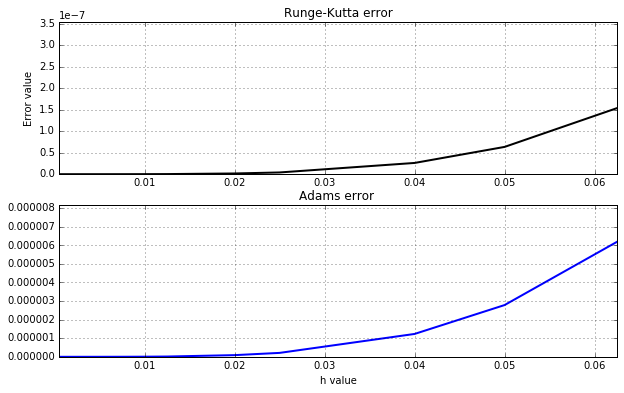

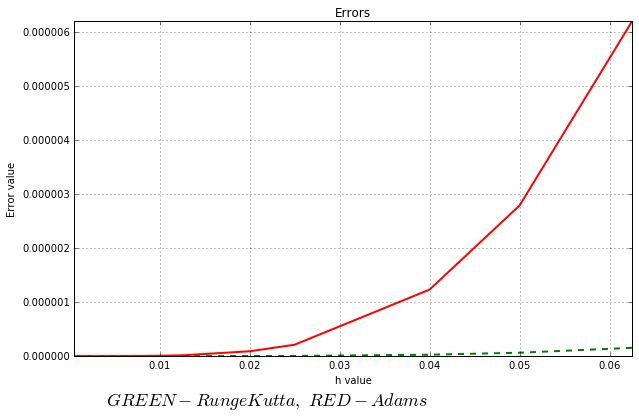

In [110]:

#Errors (separately)
plt.figure(1, figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(h_array, a[:,0], 'black', linewidth=2.0)
plt.ylabel('Error value')
plt.xlim([h_array[0], h_array[-1]])
plt.ylim([0, (a[:,0]).max()+0.0000002])
plt.title('Runge-Kutta error')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(h_array, a[:,1], linewidth=2.0)
plt.xlabel('h value')
plt.xlim([h_array[0], h_array[-1]])
plt.ylim([0, (a[:,1]).max()+0.000002])
plt.title('Adams error ')
plt.grid(True)
plt.show()

#Errors (together)
plt.figure(2, figsize=(10,6))
lines = plt.plot(h_array, a[:,0], 'g--', h_array, a[:,1], 'r', lw=2.0)
plt.ylabel('Error value')
plt.xlabel('h value')
plt.xlim([h_array[0], h_array[-1]])
maxs=[(a[:,0]).max(), (a[:,1]).max()]
plt.ylim([0, max(maxs[0], maxs[1])])
plt.title('Errors')
plt.text(0.004, -0.0000009, r'$GREEN - RungeKutta,\ RED - Adams$', fontsize=18, color='black')
plt.grid(True)

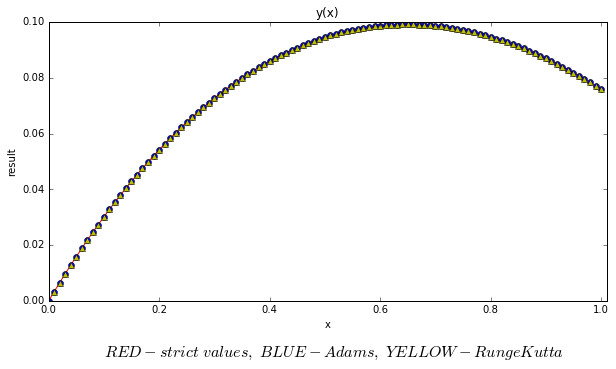

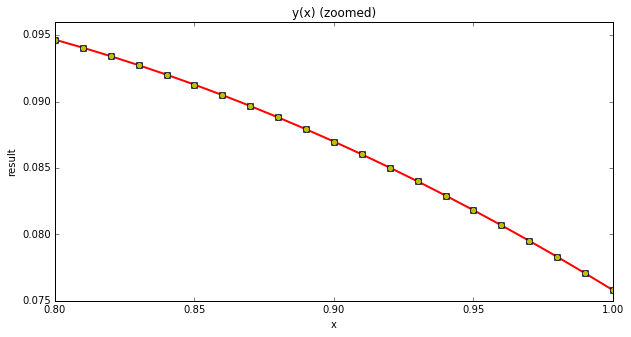

In [100]:
x = np.arange(x0, x0+1+h, step=h)
plt.figure(1, figsize=(10,5))
plt.xlim([x0,x0+1+h])
plt.plot(x,y_y,'r', x, y_a,'bo', x, y_, 'y^')
plt.title('y(x)')
plt.xlabel('x')
plt.ylabel('result')
plt.text(0.1, -0.02, r'$RED - strict\ values,\ BLUE - Adams,\ YELLOW-RungeKutta$', fontsize=16, color='black')


plt.figure(2, figsize=(10,5))
plt.xlim([0.8, 1])
plt.ylim([0.075, 0.096])
plt.plot(x,y_y,'r', x, y_a,'bs', x, y_, 'yo', lw=2.0)
plt.title('y(x) (zoomed)')
plt.xlabel('x')
plt.ylabel('result')
plt.show()
